<a href="https://colab.research.google.com/github/sidpatondikar/Capstone-Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Zomato Restaurant Clustering and Sentiment Analysis

`Contribution` : `Team`

`Team Members:`

- `Siddharth Patondikar`
- `Anas Malik`
- `Nikhil Bordekar`

### Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()
# plt.style('ggplot')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import warnings
warnings.filterwarnings('ignore')

In [2]:
review_df = pd.read_csv('Zomato Restaurant reviews.csv')

In [3]:
restaurant_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

In [4]:
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [6]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [8]:
restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [9]:
review_df[review_df['Reviewer'].isna()]['Restaurant'].value_counts()

American Wild Wings    23
Arena Eleven           15
Name: Restaurant, dtype: int64

In [10]:
review_df[review_df['Restaurant'].isin(['American Wild Wings', 'Arena Eleven'])]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8700,American Wild Wings,Karthik Sreeram,"found them on Zomato website, a very interesti...",5,1 Review,5/25/2019 16:02,0
8701,American Wild Wings,Pushpendra Singh,Out of hunger and trust on the restaurant I or...,1,"2 Reviews , 1 Follower",5/25/2019 5:21,1
8702,American Wild Wings,Harjeev Singh,I've ordered from this place a couple of times...,3,"12 Reviews , 188 Followers",5/22/2019 20:06,0
8703,American Wild Wings,Kirthi Kirthi,Worst chicken popcorn had ever in my life.stra...,3,"10 Reviews , 1 Follower",5/22/2019 17:04,0
8704,American Wild Wings,Ritwika Dash,So on my latest visit to this amazing American...,5,"25 Reviews , 63 Followers",5/22/2019 13:02,7
...,...,...,...,...,...,...,...
9095,Arena Eleven,NaN,NaN,NaN,NaN,NaN,0
9096,Arena Eleven,NaN,NaN,NaN,NaN,NaN,0
9097,Arena Eleven,NaN,NaN,NaN,NaN,NaN,0
9098,Arena Eleven,NaN,NaN,NaN,NaN,NaN,0


In [11]:
review_df.dropna(inplace=True)

In [12]:
review_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [13]:
restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [14]:
restaurant_df[restaurant_df['Collections'].isna()]

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM
25,Tiki Shack,https://www.zomato.com/hyderabad/tiki-shack-ga...,"1,000",NaN,Continental,"12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fr..."
28,Behrouz Biryani,https://www.zomato.com/hyderabad/behrouz-birya...,600,NaN,"Mughlai, Biryani",10 AM to 1 AM
29,Hunger Maggi Point,https://www.zomato.com/hyderabad/hunger-maggi-...,200,NaN,Fast Food,4:30 PM to 5:30 AM
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN
33,Club Rogue,https://www.zomato.com/hyderabad/club-rogue-ga...,900,NaN,"North Indian, Fast Food",11 AM to 12 Midnight


In [15]:
restaurant_df_copy = restaurant_df.copy()

restaurant_df_copy.dropna(inplace=True)

In [16]:
restaurant_df_copy.isnull().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

## Data Wrangling

In [17]:
def get_domain(x):
  lst = x.split('.')
  return lst[1]

restaurant_df_copy['Domain'] = restaurant_df_copy['Links'].apply(get_domain)

In [18]:
restaurant_df_copy['Domain'].value_counts()

zomato    51
Name: Domain, dtype: int64

In [19]:
def count_cuisines(dataframe):
    # Split the comma-separated cuisines and create a list of all cuisines
    all_cuisines = dataframe['Cuisines'].str.split(', ').explode()

    # Use value_counts to count the occurrences of each cuisine
    cuisine_counts = all_cuisines.value_counts().reset_index()
    cuisine_counts.columns = ['Cuisine', 'Count']

    return cuisine_counts

In [20]:
cuisine_counts = count_cuisines(restaurant_df_copy)
cuisine_counts

,Cuisine,Count
0,North Indian,36
1,Chinese,24
2,Continental,15
3,Italian,12
4,Asian,10
5,South Indian,6
6,Kebab,6
7,American,5
8,Mediterranean,5
9,Desserts,5


In [21]:
review_df['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [22]:
review_df[review_df['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


Changing the Rating 'Like' to 5 based on the review

In [23]:
def change_rating(X):
  if X=='Like':
    return float(5)
  else:
    return math.ceil(float(X))

review_df['Rating'] = review_df['Rating'].apply(change_rating)

In [24]:
review_df['Rating'].value_counts()

5.0    3896
4.0    2420
1.0    1735
3.0    1211
2.0     693
Name: Rating, dtype: int64

In [34]:
review_df['Time'] = pd.to_datetime(review_df['Time'])
review_df['Time_HM'] =  review_df['Time'].dt.time

In [36]:
review_df["Hour"] = review_df['Time'].dt.hour

In [37]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Time_HM,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,15:54:00,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,14:20:00,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,22:54:00,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,22:11:00,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,21:37:00,21


## Exploratory Data Analysis

### Univariate Analysis

In [25]:
restaurant_df_copy.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Domain
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",zomato
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,zomato
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",zomato
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,zomato
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",zomato


In [26]:
restaurant_df_copy['Cost'].dtype

dtype('O')

In [27]:
restaurant_df_copy['Cost'] = restaurant_df_copy['Cost'].apply(lambda x : int(x.replace(',','')))
restaurant_df_copy.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Domain
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",zomato
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,zomato
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",zomato
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,zomato
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",zomato


<Axes: xlabel='Cost', ylabel='Density'>

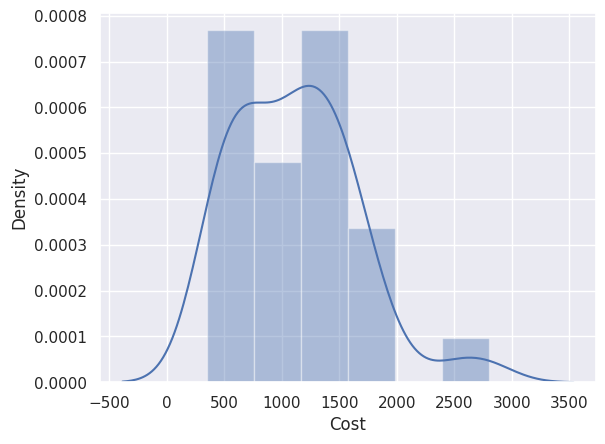

In [28]:
#Chart - 1

#Distribution of cost

sns.distplot(restaurant_df_copy['Cost'])

- Most restaurants costs between 500-2000

<Axes: xlabel='Count', ylabel='Cuisine'>

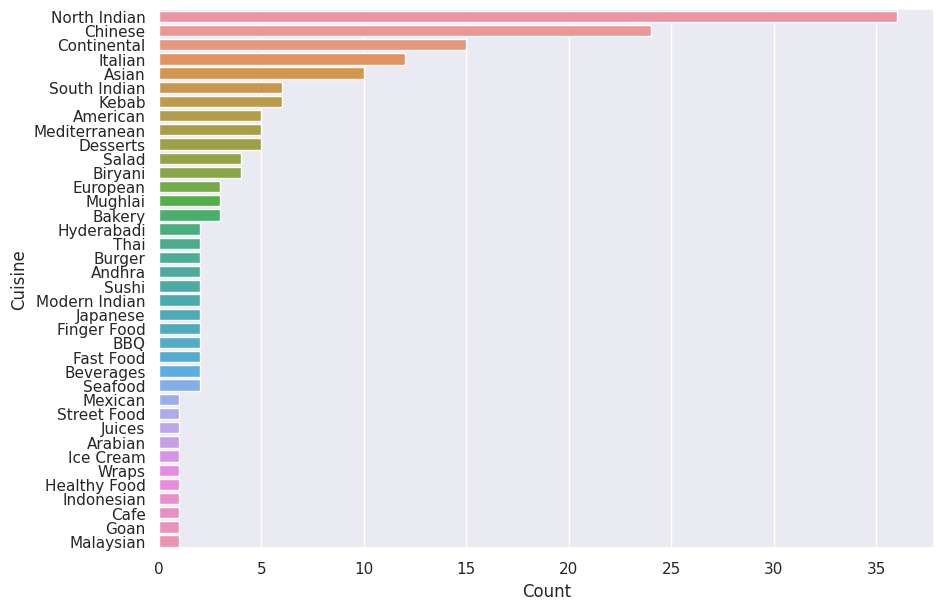

In [29]:
# Chart-2

#Total count of each cuisine
plt.figure(figsize=(10,7))
sns.barplot(data=cuisine_counts, y='Cuisine',x='Count',orient='h')

In [30]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


<Axes: xlabel='Rating', ylabel='count'>

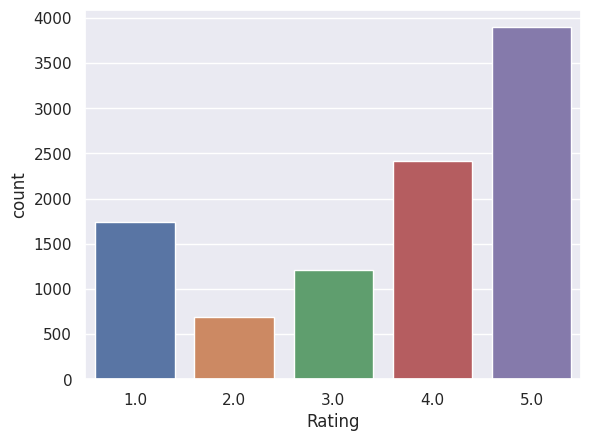

In [31]:
# Chart-3

sns.countplot(data=review_df,x='Rating')

- Over 3500 reviews are rated over 5
-

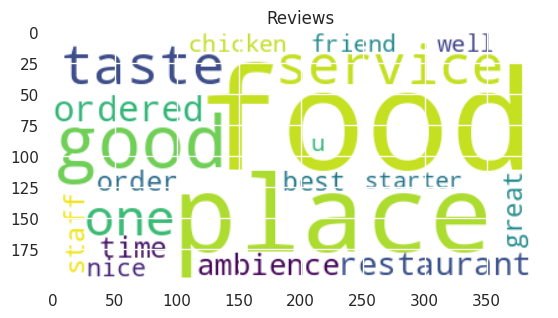

In [33]:
# Chart - 4

#Wordcloud for column review
review = ' '.join(word for word in review_df['Review'].tolist())
wordcloud_title = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(review)

plt.imshow(wordcloud_title,interpolation='bilinear')
plt.title('Reviews')
plt.show()


<Axes: xlabel='Hour', ylabel='Density'>

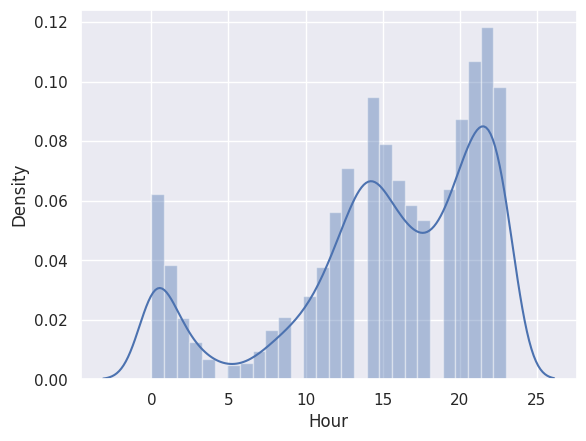

In [39]:
#Chart - 5

#Distribution of review time
sns.distplot(review_df['Hour'])